### Imports

In [83]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

# Gradient Descent

The function  take the following input parameters:
-  Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations





The function return the following:
- All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1


In [86]:
def GD(in_data,target,learning_rate,iter):
    
    in_data=in_data.reshape((-1,1))
    thetas = np.zeros([2,1])
    theta_zeros= []
    theta_ones = []
    m=len(in_data)
    x_vec=np.ones((m,2))
    x_vec[:,1]=x
    target=target.reshape((-1,1))

    theta_zeros.append(0)
    theta_ones.append(0)
    hypothsis=[]
    itr=[]
    MSE=[]
    
    #print(x_vec.shape)
    
    for i in range(iter): 

        y_predict =  x_vec @ thetas 
    
        hypothsis.append(y_predict)
        
    
        gradient= (-1/m) * ((target-y_predict).transpose() @ x_vec )
        
        thetas= thetas - (learning_rate * gradient.transpose())
       
       
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
        itr.append(i)
       
        theta_zeros.append(thetas[0])
        theta_ones.append(thetas[1])
        
        if i>0:
            if (abs(MSE[i]-MSE[i-1])<0.001):
                break
            if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
                break
    MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
    itr.append(i)
    return theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec


To have a dataset or set of data points, generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [84]:
x= np.linspace(0,20)
a=-2
b=1
y= a*x + b

In [85]:
print(x)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.6734

In [87]:
iterations=500
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec = GD(x,y,0.001,iterations)
print(thetas)

[[-0.13081366]
 [-1.90825034]]


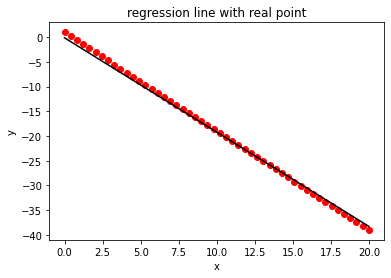

In [88]:
y_predicted= x_vec @ thetas
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line with real point")
plt.show()

#### Calculate r2 score

In [89]:
r2_score(y, y_predicted)

0.9975676022881939

#### Plot loss vs. epochs

In [90]:
itr=range(0,iterations)
itr=itr[0:len(MSE)]

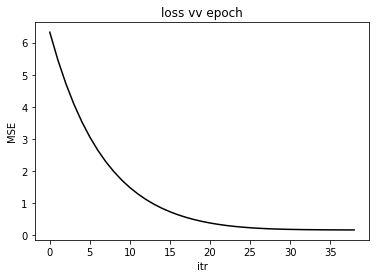

In [91]:
plt.plot(itr,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("itr")
plt.ylabel("MSE")
plt.title("loss vv epoch")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


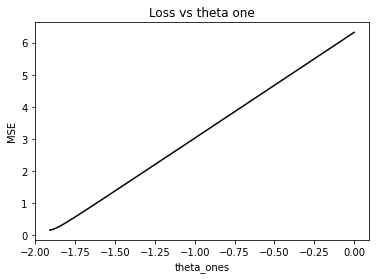

In [92]:
plt.plot(theta_ones,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta_ones")
plt.ylabel("MSE")
plt.title("Loss vs theta one")
plt.show()

#### Plot all regression lines till converge

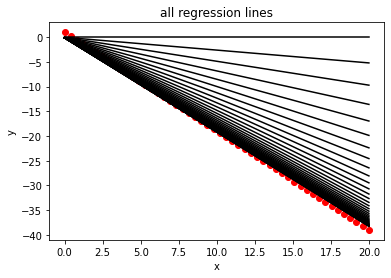

In [93]:
plt.scatter(x, y, marker='o', color='red')
for h in hypothsis:
    plt.plot(x,h, color='black',markerfacecolor='red',linestyle='-')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("all regression lines")
plt.show()

#### Plot the best regression line

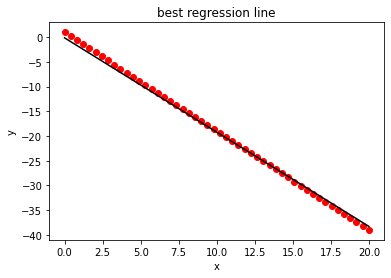

In [94]:
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("best regression line")
plt.show()

# Batch Gradient Descent

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations

In [95]:
def minibatch_GD(in_data,target,learning_rate,iter):
    
    in_data=in_data.reshape((-1,1))
    thetas = np.zeros([2,1])
    theta_zeros= []
    theta_ones = []
    m=len(in_data)
    x_vec=np.ones((m,2))
    x_vec[:,1]=x
    target=target.reshape((-1,1))

    p=5
    hypothsis =[]
    MSE=[]
    epoch=[]

    theta_zeros.append(0)
    theta_ones.append(0)
    
    #print(x_vec.shape)
    epoch_num=iter//p
    for i in range(epoch_num):
        for j in range(p): 
           
            y_predict =  x_vec @ thetas 
            hypothsis.append(y_predict)

            gradient= (-1/p) * ((target-y_predict).transpose() @ x_vec )

            thetas= thetas - (learning_rate * gradient.transpose())

            theta_zeros.append(thetas[0])
            theta_ones.append(thetas[1])
        
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/p))
        epoch.append(i)
        
        if i>0:
            if (abs(MSE[i]-MSE[i-1])<0.001):
                break
            if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
                break
    return theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,epoch



In [62]:
### First without shuffeling data
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,epoch = minibatch_GD(x,y,0.0001,500)
print(thetas)

[[-0.08399403]
 [-1.91936831]]


In [63]:
### Now with shuffeling
data=[x,y]
data_shuffeled = shuffle(data)


In [64]:

theta_zeros_shuffeled ,theta_ones_shuffeled ,MSE_shuffeled,hypothsis_shuffeled, thetas_shuffeled, x_vec_shuffeled ,epoch_shuff = minibatch_GD(data_shuffeled[0],data_shuffeled[1],0.0001,500)
print(thetas_shuffeled)

[[-0.08399403]
 [-1.91936831]]


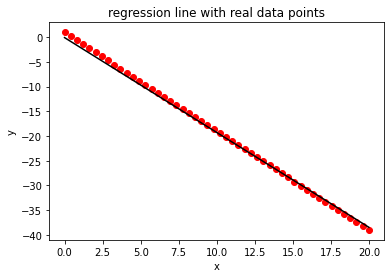

In [65]:
y_predicted= x_vec @ thetas
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line with real data points")
plt.show()

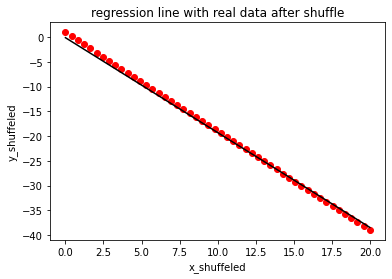

In [66]:
y_predicted_shuffeled= x_vec_shuffeled @ thetas_shuffeled
plt.scatter(data_shuffeled[0], data_shuffeled[1], marker='o', color='red')
plt.plot(data_shuffeled[0],y_predicted_shuffeled, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x_shuffeled")
plt.ylabel("y_shuffeled")
plt.title("regression line with real data after shuffle")
plt.show()

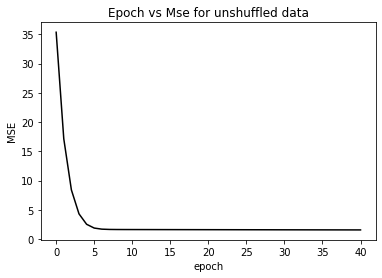

In [67]:
plt.plot(epoch,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Epoch vs Mse for unshuffled data")
plt.show()

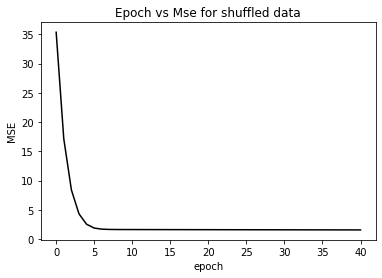

In [68]:
plt.plot(epoch_shuff,MSE_shuffeled, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Epoch vs Mse for shuffled data")
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations


In [77]:
def stochastic_GD(in_data,target,learning_rate,iter):

    in_data=in_data.reshape((-1,1))
    thetas = np.zeros([2,1])
    theta_zeros= []
    theta_ones = []
    m=len(in_data)
    x_vec=np.ones((m,2))
    x_vec[:,1]=x
    target=target.reshape((-1,1))

    p=1
    hypothsis =[]
    epoch=[]
    MSE=[]
    
       
    theta_zeros.append(0)
    theta_ones.append(0)
    
    #print(x_vec.shape)
    epoch_num=iter//p
    for i in range(epoch_num):
        for j in range(p): 
           
            y_predict =  x_vec @ thetas 
            hypothsis.append(y_predict)

            gradient= (-1/p) * ((target-y_predict).transpose() @ x_vec )

            thetas= thetas - (learning_rate * gradient.transpose())

            theta_zeros.append(thetas[0])
            theta_ones.append(thetas[1])
        
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/p))
        epoch.append(i)
        
        if i>0:
            if (abs(MSE[i]-MSE[i-1])<0.001):
                break
            if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
                break
    return theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,epoch



In [78]:
### First without shuffeling data
theta_zeros,theta_ones,MSE,hypothsis,thetas,x_vec,epoch = stochastic_GD(x,y,0.0001,500)
print(thetas)

[[-0.12933924]
 [-1.91592206]]


In [79]:
###now with shuffeling data
data=[x,y]
data_shuffeled = shuffle(data)
theta_zeros_shuffeled ,theta_ones_shuffeled ,MSE_shuffeled,hypothsis_shuffeled, thetas_shuffeled, x_vec_shuffeled ,epoch_shuff = minibatch_GD(data_shuffeled[0],data_shuffeled[1],0.0001,500)
print(thetas_shuffeled)

[[0.07283424]
 [0.99442095]]


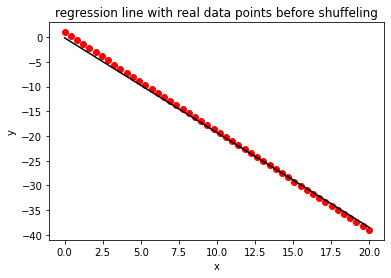

In [76]:
y_predicted= x_vec @ thetas
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,y_predicted, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line with real data points before shuffeling")
plt.show()

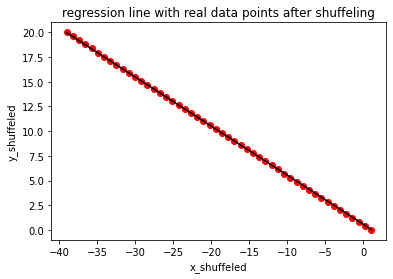

In [80]:
y_predicted_shuffeled= x_vec_shuffeled @ thetas_shuffeled
plt.scatter(data_shuffeled[0], data_shuffeled[1], marker='o', color='red')
plt.plot(data_shuffeled[0],y_predicted_shuffeled, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("x_shuffeled")
plt.ylabel("y_shuffeled")
plt.title("regression line with real data points after shuffeling")
plt.show()

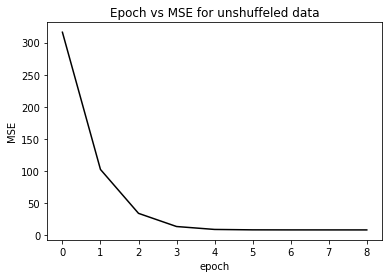

In [81]:
plt.plot(epoch,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Epoch vs MSE for unshuffeled data")
plt.show()

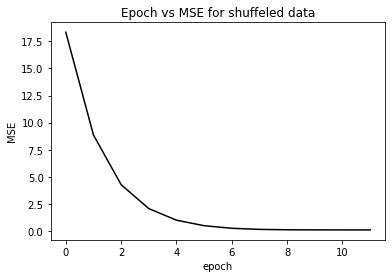

In [82]:
plt.plot(epoch_shuff,MSE_shuffeled, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Epoch vs MSE for shuffeled data")
plt.show()